<a href="https://colab.research.google.com/github/nattntn/15-23yrs_EffNet/blob/main/Transfer_with_Gender/Test/15_23_04_Eff_Classify_Predict_250Freeze_Unflipped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import

In [ ]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Clone Efficient

In [ ]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 16.69 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load Model

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Classification_Gender(15-23)/4_Class_1e-4_250_Freeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Classification_Gender(15-23)/4_Class_1e-4_250_Freeze.h5")
model.summary()

Model: "EffNet_Classification"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_no

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


# Data Preparation

In [ ]:
train = pd.read_csv(r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Multi_task(15-23)/table_train_15_23_Gender.csv')
train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class
0,1833,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B07.jpg,9,0
1,1834,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB07.jpg,7,0
2,1835,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B08.jpg,5,0
3,1836,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB08.jpg,10,0
4,1837,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B18.jpg,8,0
...,...,...,...,...,...,...,...,...,...
1947,3780,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE429.jpg,10,1
1948,3781,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E430.jpg,6,1
1949,3782,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE430.jpg,10,1
1950,3783,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E431.jpg,10,1


In [ ]:
train = train.iloc[:,1:]

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      # horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = DATA_PATH,
        x_col = 'Path_Name',
        y_col = 'Gender_Class',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width),# รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)
#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 1952 validated image filenames.


In [ ]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(15-23)/table_test_15_23_forGender.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,0,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,0,Female
1,1,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,0,Female
2,2,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,0,Female
3,3,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,0,Female
4,4,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,0,Female
...,...,...,...,...,...,...,...,...,...
445,445,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female
446,446,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male
447,447,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male
448,448,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female


In [ ]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,0,Female
1,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,0,Female
2,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,0,Female
3,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,0,Female
4,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,0,Female
...,...,...,...,...,...,...,...,...
445,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female
446,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male
447,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male
448,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female


# Predict

In [ ]:
act_int = test['Gender_Class'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])[0]

1/1 [==============================] - 4s 4s/step


0.036506057

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    re_prop = np.argmax(predict)
    pred_list.append(result)
    prob_list.append(predict[re_prop])

1/1 [==============================] - 0s 30ms/step


In [ ]:
pred_list

[0.036506057,
 0.15185502,
 0.007586455,
 0.058997504,
 0.036768924,
 0.3251863,
 0.0020506792,
 0.050884895,
 0.0001442567,
 0.0003166835,
 0.09872608,
 0.2945963,
 8.30988e-05,
 5.4361688e-05,
 6.4650994e-05,
 9.355925e-05,
 0.2766591,
 0.10162188,
 0.18070224,
 0.05284201,
 0.00026734435,
 2.8210847e-05,
 0.00037915207,
 0.0016595757,
 0.003132984,
 0.00096808706,
 0.98416346,
 0.99362457,
 0.15734448,
 0.0038826852,
 0.96025884,
 0.7972878,
 0.09401914,
 0.22350523,
 0.17362906,
 0.0038999764,
 0.32738876,
 0.907458,
 0.92016524,
 0.86076134,
 0.49931508,
 0.8550439,
 0.95556915,
 0.8721653,
 0.48908103,
 0.59689105,
 0.96975046,
 0.60575396,
 0.9874363,
 0.4100508,
 0.0047332253,
 0.014045074,
 0.02930839,
 0.07085117,
 0.0147694545,
 0.00060310034,
 0.022153892,
 0.046952378,
 0.095512696,
 0.2853486,
 0.86039513,
 0.0048014084,
 0.031102013,
 0.00016571407,
 0.023810992,
 0.020951433,
 0.0014686462,
 0.030643677,
 0.042962354,
 0.0005624032,
 0.0036935057,
 0.05852222,
 0.041641

In [ ]:
print(type(pred_list))

<class 'list'>


In [ ]:
list_pred = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in pred_list:
    if value >= 0.5:
        list_pred = np.append(list_pred, 'Male')
    else:
        list_pred = np.append(list_pred, 'Female')

# แสดงผลลัพธ์
print(list_pred)

['Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Femal

In [ ]:
test['Predict_float'] = pred_list
test['Predict_str'] = list_pred
# แสดง DataFrame
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
0,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,0,Female,0.036506,Female
1,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,0,Female,0.151855,Female
2,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,0,Female,0.007586,Female
3,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,0,Female,0.058998,Female
4,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,0,Female,0.036769,Female
...,...,...,...,...,...,...,...,...,...,...
445,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female,0.007410,Female
446,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male,0.800625,Male
447,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male,0.729750,Male
448,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female,0.016859,Female


In [ ]:
#test.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/EfficientNet_Class_Func_224/Table_test_Predict_Gender224.csv')

In [ ]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
0,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,0,Female,0.036506,Female
1,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,0,Female,0.151855,Female
2,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,0,Female,0.007586,Female
3,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,0,Female,0.058998,Female
4,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,0,Female,0.036769,Female
...,...,...,...,...,...,...,...,...,...,...
445,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female,0.007410,Female
446,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male,0.800625,Male
447,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male,0.729750,Male
448,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female,0.016859,Female


# Evaluate All

In [ ]:
pred_str = np.array(list_pred) #แปลงเป็น array
act_str = np.array(test['Gender_Predict'].tolist())

pred_int = np.array(pred_list) #แปลงเป็น array
act_int = test['Gender_Class'].tolist() #ค่าจริง

## confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 78.44444444444444%
              precision    recall  f1-score   support

      Female       0.71      0.96      0.82       225
        Male       0.93      0.61      0.74       225

    accuracy                           0.78       450
   macro avg       0.82      0.78      0.78       450
weighted avg       0.82      0.78      0.78       450



Text(0.5, 76.24999999999999, 'Predicted label')

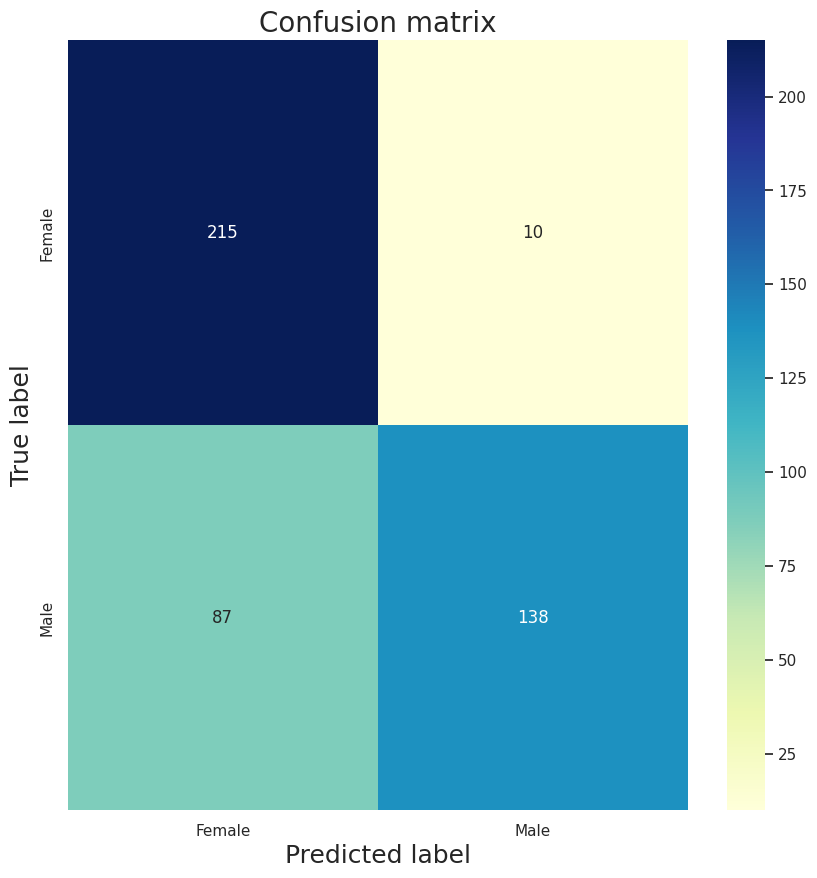

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2386073088666348
MSE: 0.15527385858905604
RMSE: 0.3940480409658904


# ROC

In [ ]:
pred_list

[0.036506057,
 0.15185502,
 0.007586455,
 0.058997504,
 0.036768924,
 0.3251863,
 0.0020506792,
 0.050884895,
 0.0001442567,
 0.0003166835,
 0.09872608,
 0.2945963,
 8.30988e-05,
 5.4361688e-05,
 6.4650994e-05,
 9.355925e-05,
 0.2766591,
 0.10162188,
 0.18070224,
 0.05284201,
 0.00026734435,
 2.8210847e-05,
 0.00037915207,
 0.0016595757,
 0.003132984,
 0.00096808706,
 0.98416346,
 0.99362457,
 0.15734448,
 0.0038826852,
 0.96025884,
 0.7972878,
 0.09401914,
 0.22350523,
 0.17362906,
 0.0038999764,
 0.32738876,
 0.907458,
 0.92016524,
 0.86076134,
 0.49931508,
 0.8550439,
 0.95556915,
 0.8721653,
 0.48908103,
 0.59689105,
 0.96975046,
 0.60575396,
 0.9874363,
 0.4100508,
 0.0047332253,
 0.014045074,
 0.02930839,
 0.07085117,
 0.0147694545,
 0.00060310034,
 0.022153892,
 0.046952378,
 0.095512696,
 0.2853486,
 0.86039513,
 0.0048014084,
 0.031102013,
 0.00016571407,
 0.023810992,
 0.020951433,
 0.0014686462,
 0.030643677,
 0.042962354,
 0.0005624032,
 0.0036935057,
 0.05852222,
 0.041641

In [ ]:
prob_list

[0.036506057,
 0.15185502,
 0.007586455,
 0.058997504,
 0.036768924,
 0.3251863,
 0.0020506792,
 0.050884895,
 0.0001442567,
 0.0003166835,
 0.09872608,
 0.2945963,
 8.30988e-05,
 5.4361688e-05,
 6.4650994e-05,
 9.355925e-05,
 0.2766591,
 0.10162188,
 0.18070224,
 0.05284201,
 0.00026734435,
 2.8210847e-05,
 0.00037915207,
 0.0016595757,
 0.003132984,
 0.00096808706,
 0.98416346,
 0.99362457,
 0.15734448,
 0.0038826852,
 0.96025884,
 0.7972878,
 0.09401914,
 0.22350523,
 0.17362906,
 0.0038999764,
 0.32738876,
 0.907458,
 0.92016524,
 0.86076134,
 0.49931508,
 0.8550439,
 0.95556915,
 0.8721653,
 0.48908103,
 0.59689105,
 0.96975046,
 0.60575396,
 0.9874363,
 0.4100508,
 0.0047332253,
 0.014045074,
 0.02930839,
 0.07085117,
 0.0147694545,
 0.00060310034,
 0.022153892,
 0.046952378,
 0.095512696,
 0.2853486,
 0.86039513,
 0.0048014084,
 0.031102013,
 0.00016571407,
 0.023810992,
 0.020951433,
 0.0014686462,
 0.030643677,
 0.042962354,
 0.0005624032,
 0.0036935057,
 0.05852222,
 0.041641

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test['Gender_Class'].tolist()
predicted_probabilities = prob_list

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

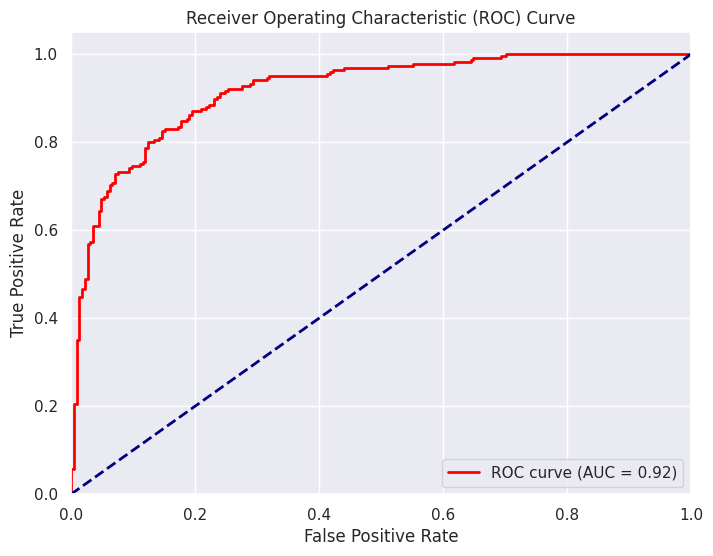

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 15 year

In [ ]:
Y15 = test[test['Age(year)'] == 15]
Y15

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
0,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,0,Female,0.036506,Female
1,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,0,Female,0.151855,Female
2,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,0,Female,0.007586,Female
3,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,0,Female,0.058998,Female
4,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,0,Female,0.036769,Female
5,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB157.jpg,0,Female,0.325186,Female
6,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B162.jpg,0,Female,0.002051,Female
7,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB162.jpg,0,Female,0.050885,Female
8,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B166.jpg,0,Female,0.000144,Female
9,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB166.jpg,0,Female,0.000317,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y15['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y15['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y15['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y15['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 78.43137254901961%
              precision    recall  f1-score   support

      Female       0.70      1.00      0.83        26
        Male       1.00      0.56      0.72        25

    accuracy                           0.78        51
   macro avg       0.85      0.78      0.77        51
weighted avg       0.85      0.78      0.77        51



Text(0.5, 76.24999999999999, 'Predicted label')

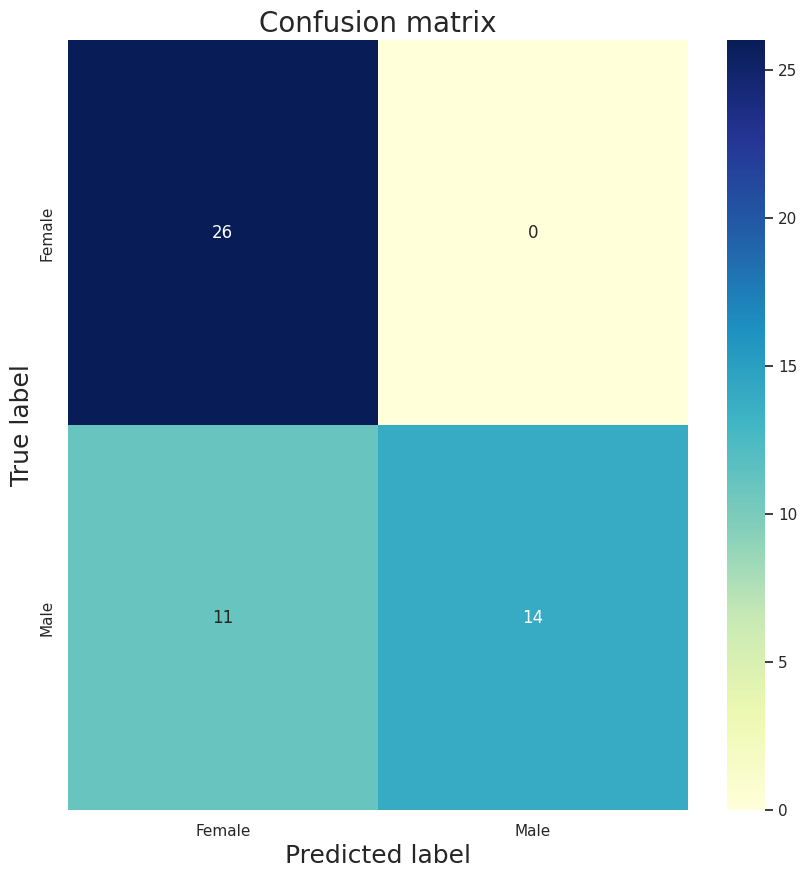

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.23586267766846752
MSE: 0.15482337092241433
RMSE: 0.3934760106060017


# 16 year

In [ ]:
Y16 = test[test['Age(year)'] == 16]
Y16

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
51,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T159.jpg,0,Female,0.014045,Female
52,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT159.jpg,0,Female,0.029308,Female
53,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T177.jpg,0,Female,0.070851,Female
54,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT177.jpg,0,Female,0.014769,Female
55,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T178.jpg,0,Female,0.000603,Female
56,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT178.jpg,0,Female,0.022154,Female
57,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T181.jpg,0,Female,0.046952,Female
58,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT181.jpg,0,Female,0.095513,Female
59,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T183.jpg,0,Female,0.285349,Female
60,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT183.jpg,0,Female,0.860395,Male


## confusion_matrix

In [ ]:
pred_str = np.array(Y16['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y16['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y16['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y16['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 80.0%
              precision    recall  f1-score   support

      Female       0.73      0.96      0.83        25
        Male       0.94      0.64      0.76        25

    accuracy                           0.80        50
   macro avg       0.83      0.80      0.79        50
weighted avg       0.83      0.80      0.79        50



Text(0.5, 76.24999999999999, 'Predicted label')

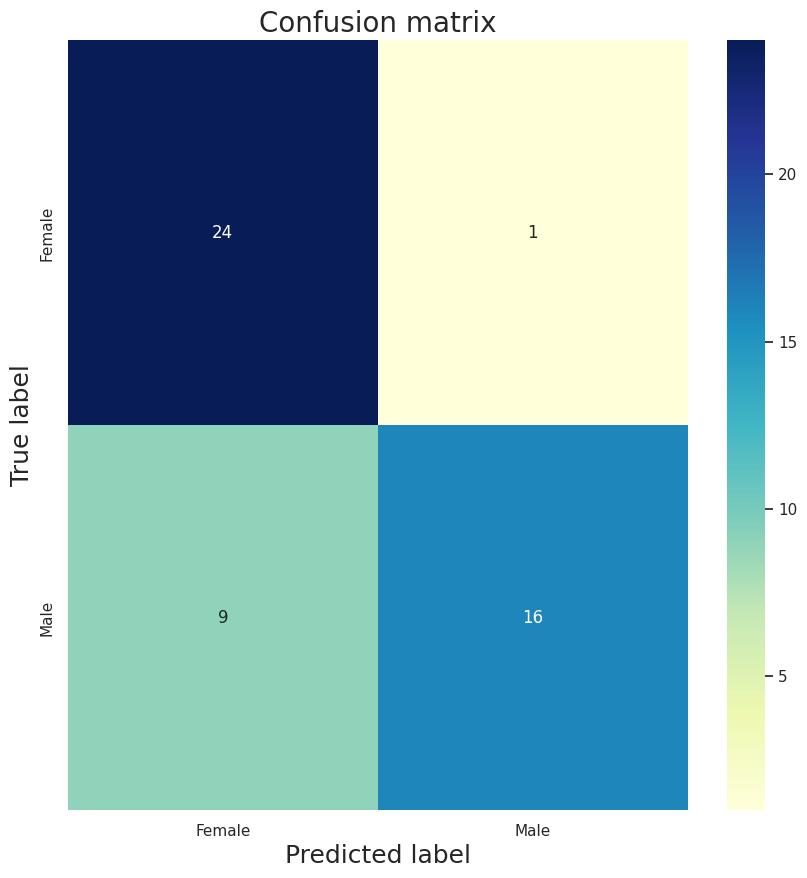

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.21854009827889967
MSE: 0.14167087010891394
RMSE: 0.37639191025965735


# 17 year

In [ ]:
Y17 = test[test['Age(year)'] == 17]
Y17

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
97,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,K141.jpg,0,Female,0.931662,Male
98,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipK141.jpg,0,Female,0.468384,Female
99,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,K155.jpg,0,Female,0.035138,Female
100,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipK155.jpg,0,Female,0.000499,Female
101,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,K157.jpg,0,Female,0.016474,Female
102,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipK157.jpg,0,Female,0.010864,Female
103,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,K167.jpg,0,Female,0.011218,Female
104,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipK167.jpg,0,Female,0.021381,Female
105,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,K176.jpg,0,Female,0.027582,Female
106,17,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipK176.jpg,0,Female,0.004388,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y17['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y17['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y17['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y17['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 78.43137254901961%
              precision    recall  f1-score   support

      Female       0.75      0.84      0.79        25
        Male       0.83      0.73      0.78        26

    accuracy                           0.78        51
   macro avg       0.79      0.79      0.78        51
weighted avg       0.79      0.78      0.78        51



Text(0.5, 76.24999999999999, 'Predicted label')

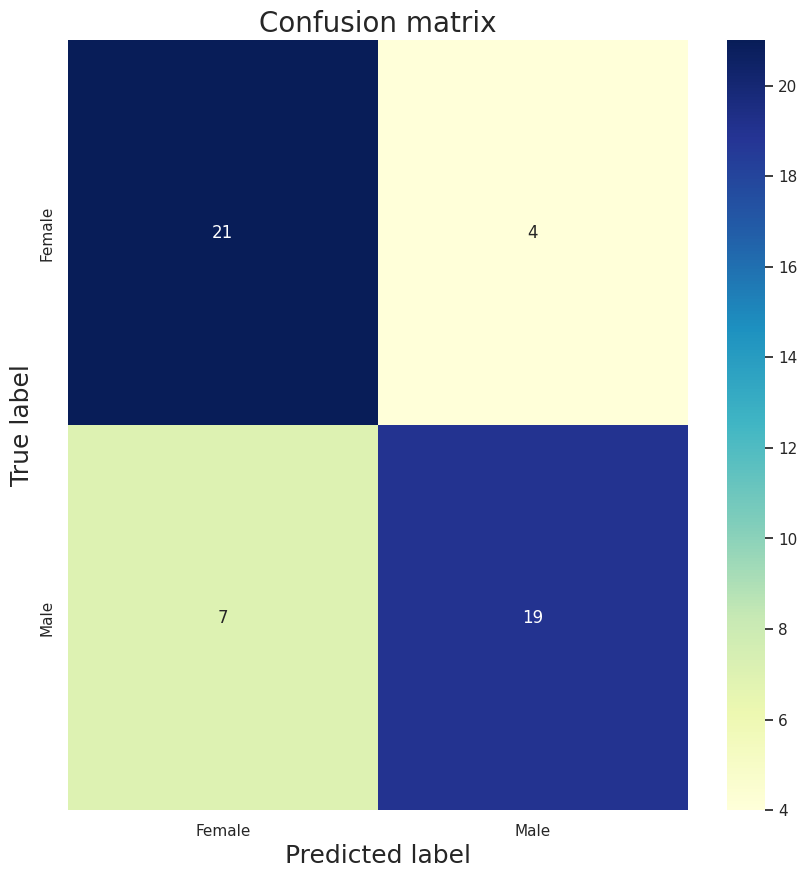

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.27886272497319925
MSE: 0.15422108482670424
RMSE: 0.39270992453298686


# 18 year

In [ ]:
Y18 = test[test['Age(year)'] == 18]
Y18

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
147,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,S153.jpg,0,Female,0.006002,Female
148,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipS153.jpg,0,Female,0.001625,Female
149,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,S159.jpg,0,Female,0.000119,Female
150,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipS159.jpg,0,Female,0.002062,Female
151,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,S167.jpg,0,Female,0.785019,Male
152,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipS167.jpg,0,Female,0.990673,Male
153,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,S158.jpg,0,Female,0.009302,Female
154,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipS158.jpg,0,Female,0.001022,Female
155,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,S155.jpg,0,Female,0.006265,Female
156,18,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipS155.jpg,0,Female,0.000631,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y18['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y18['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y18['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y18['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 72.0%
              precision    recall  f1-score   support

      Female       0.66      0.92      0.77        25
        Male       0.87      0.52      0.65        25

    accuracy                           0.72        50
   macro avg       0.76      0.72      0.71        50
weighted avg       0.76      0.72      0.71        50



Text(0.5, 76.24999999999999, 'Predicted label')

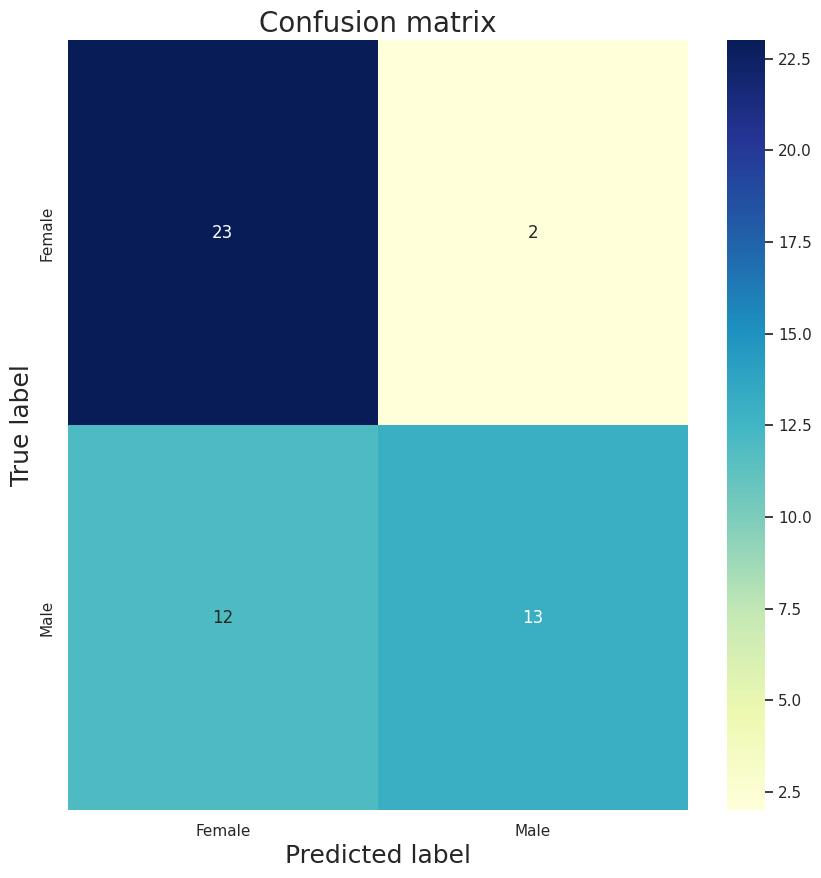

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2764048457490571
MSE: 0.19015346969184943
RMSE: 0.4360659006295372


# 19 year

In [ ]:
Y19 = test[test['Age(year)'] == 19]
Y19

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
197,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,L220.jpg,0,Female,0.001595,Female
198,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipL220.jpg,0,Female,0.012480,Female
199,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,L230.jpg,0,Female,0.006587,Female
200,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipL230.jpg,0,Female,0.003465,Female
201,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,L231.jpg,0,Female,0.008610,Female
202,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipL231.jpg,0,Female,0.000308,Female
203,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,L232.jpg,0,Female,0.118671,Female
204,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipL232.jpg,0,Female,0.118991,Female
205,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,L240.jpg,0,Female,0.151396,Female
206,19,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipL240.jpg,0,Female,0.365517,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y19['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y19['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y19['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y19['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 81.63265306122449%
              precision    recall  f1-score   support

      Female       0.73      1.00      0.84        24
        Male       1.00      0.64      0.78        25

    accuracy                           0.82        49
   macro avg       0.86      0.82      0.81        49
weighted avg       0.87      0.82      0.81        49



Text(0.5, 76.24999999999999, 'Predicted label')

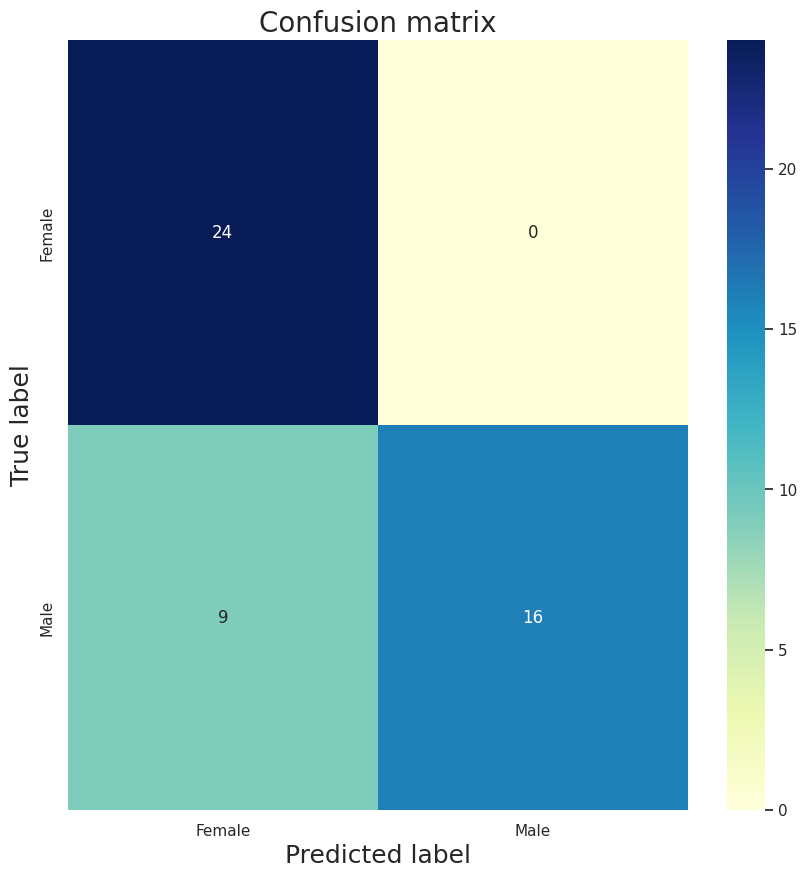

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.20193214056684045
MSE: 0.12269903106469963
RMSE: 0.35028421469529514


# 20 year

In [ ]:
Y20 = test[test['Age(year)'] == 20]
Y20

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
246,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q249.jpg,0,Female,0.000636,Female
247,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ249.jpg,0,Female,0.006654,Female
248,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q251.jpg,0,Female,0.179206,Female
249,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ251.jpg,0,Female,0.194321,Female
250,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q254.jpg,0,Female,0.001884,Female
251,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ254.jpg,0,Female,0.000161,Female
252,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q264.jpg,0,Female,0.006717,Female
253,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ264.jpg,0,Female,0.039306,Female
254,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q270.jpg,0,Female,0.000140,Female
255,20,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ270.jpg,0,Female,0.000918,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y20['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y20['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y20['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y20['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 75.51020408163265%
              precision    recall  f1-score   support

      Female       0.70      0.92      0.79        25
        Male       0.88      0.58      0.70        24

    accuracy                           0.76        49
   macro avg       0.79      0.75      0.75        49
weighted avg       0.78      0.76      0.75        49



Text(0.5, 76.24999999999999, 'Predicted label')

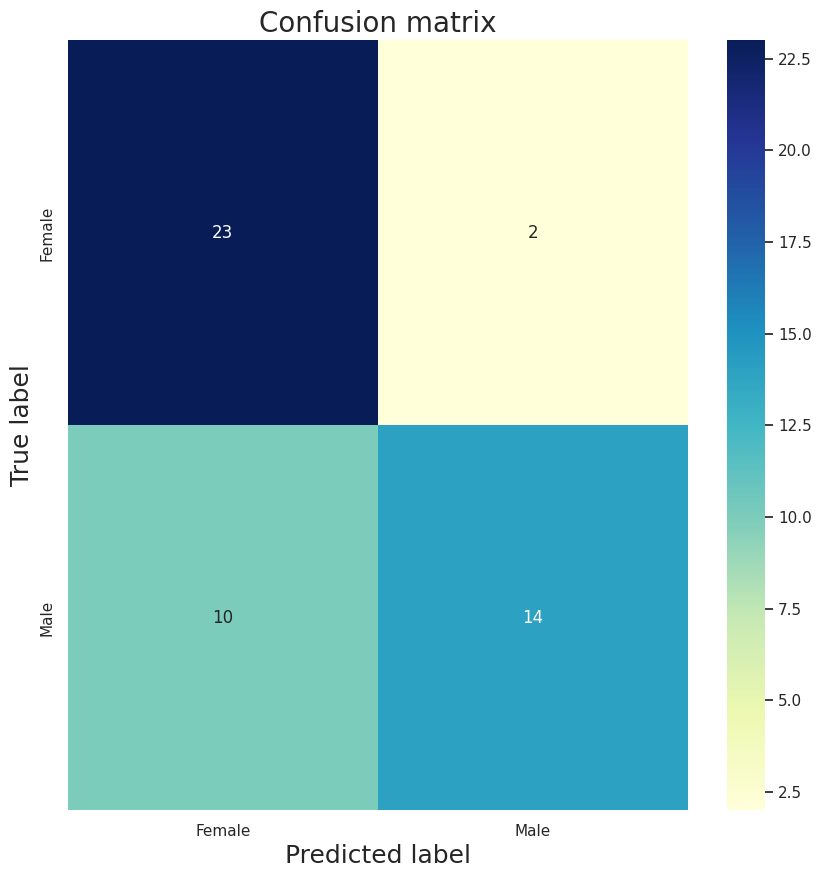

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2544845070150011
MSE: 0.16080159956029733
RMSE: 0.40100074758072124


# 21 year

In [ ]:
Y21 = test[test['Age(year)'] == 21]
Y21

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
293,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,N150.jpg,0,Female,0.004108,Female
294,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN150.jpg,0,Female,0.002408,Female
295,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,N158.jpg,0,Female,0.000941,Female
296,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN158.jpg,0,Female,0.007895,Female
297,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,N164.jpg,0,Female,0.003883,Female
298,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN164.jpg,0,Female,0.003205,Female
299,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,N167.jpg,0,Female,0.000078,Female
300,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN167.jpg,0,Female,0.000121,Female
301,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,N168.jpg,0,Female,0.004019,Female
302,21,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN168.jpg,0,Female,0.010719,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y21['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y21['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y21['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y21['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 80.0%
              precision    recall  f1-score   support

      Female       0.71      1.00      0.83        25
        Male       1.00      0.60      0.75        25

    accuracy                           0.80        50
   macro avg       0.86      0.80      0.79        50
weighted avg       0.86      0.80      0.79        50



Text(0.5, 76.24999999999999, 'Predicted label')

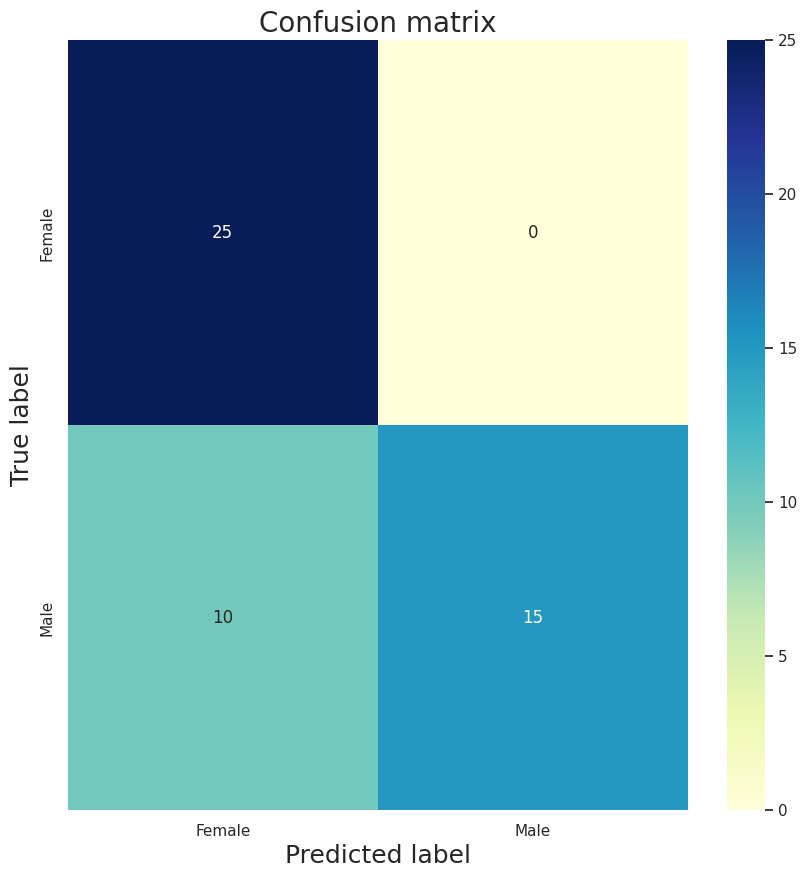

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2259076609967451
MSE: 0.16300792356851418
RMSE: 0.4037423975364913


# 22 year

In [ ]:
Y22 = test[test['Age(year)'] == 22]
Y22

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
342,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U156.jpg,0,Female,0.004741,Female
343,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipU156.jpg,0,Female,0.010530,Female
344,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U202.jpg,0,Female,0.048372,Female
345,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipU202.jpg,0,Female,0.050309,Female
346,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U297.jpg,0,Female,0.146169,Female
347,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipU297.jpg,0,Female,0.769645,Male
348,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U299.jpg,0,Female,0.029605,Female
349,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipU299.jpg,0,Female,0.019373,Female
350,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U298.jpg,0,Female,0.021165,Female
351,22,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipU298.jpg,0,Female,0.038086,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y22['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y22['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y22['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y22['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 76.0%
              precision    recall  f1-score   support

      Female       0.69      0.96      0.80        25
        Male       0.93      0.56      0.70        25

    accuracy                           0.76        50
   macro avg       0.81      0.76      0.75        50
weighted avg       0.81      0.76      0.75        50



Text(0.5, 76.24999999999999, 'Predicted label')

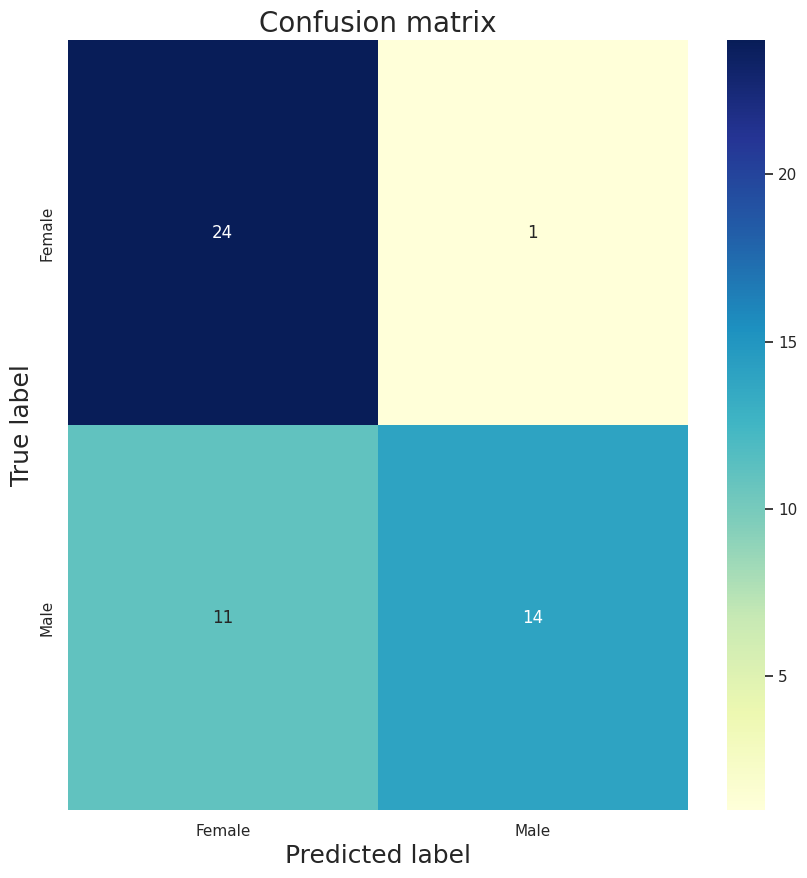

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.26657237059931504
MSE: 0.1940706857539733
RMSE: 0.4405345454717181


# 23 year

In [ ]:
Y23 = test[test['Age(year)'] == 23]
Y23

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
391,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E244.jpg,0,Female,0.010073,Female
392,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE244.jpg,0,Female,0.006234,Female
393,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E280.jpg,0,Female,0.001936,Female
394,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE280.jpg,0,Female,0.000442,Female
395,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E282.jpg,0,Female,0.009683,Female
396,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE282.jpg,0,Female,0.001698,Female
397,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E283.jpg,0,Female,0.000212,Female
398,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE283.jpg,0,Female,0.000596,Female
399,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E284.jpg,0,Female,0.314237,Female
400,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE284.jpg,0,Female,0.279905,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y23['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y23['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y23['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y23['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 84.0%
              precision    recall  f1-score   support

      Female       0.76      1.00      0.86        25
        Male       1.00      0.68      0.81        25

    accuracy                           0.84        50
   macro avg       0.88      0.84      0.84        50
weighted avg       0.88      0.84      0.84        50



Text(0.5, 76.24999999999999, 'Predicted label')

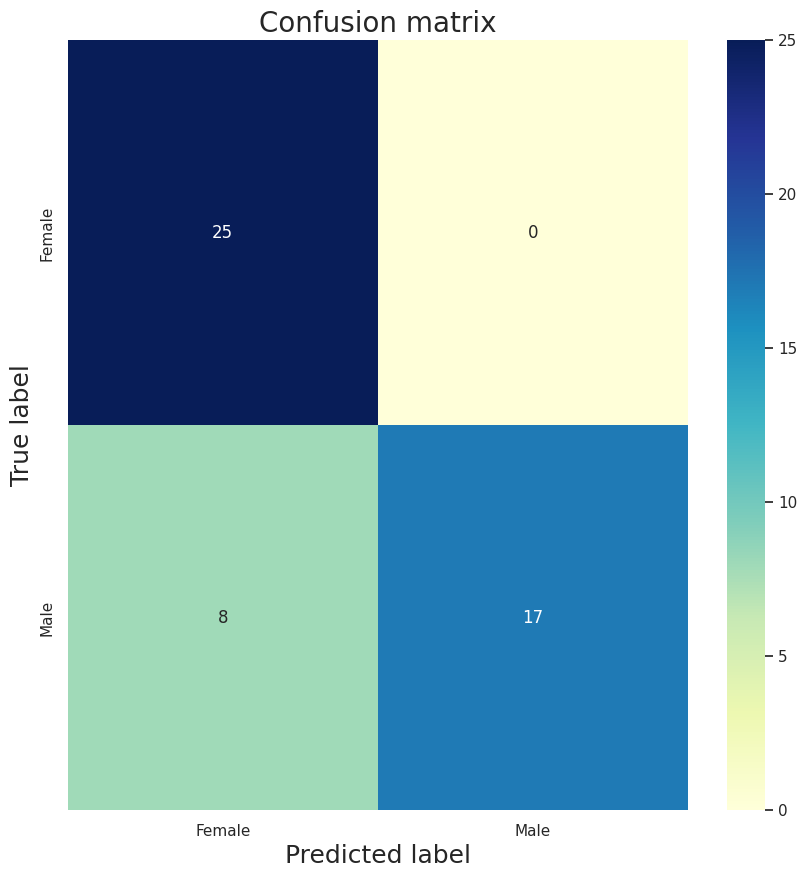

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.18773257885099157
MSE: 0.11550581530165539
RMSE: 0.33986146486716523
